## Stochastic Gradient Descent

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

In [173]:
#create dataset

np.random.seed(42)  
m = 1000 
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

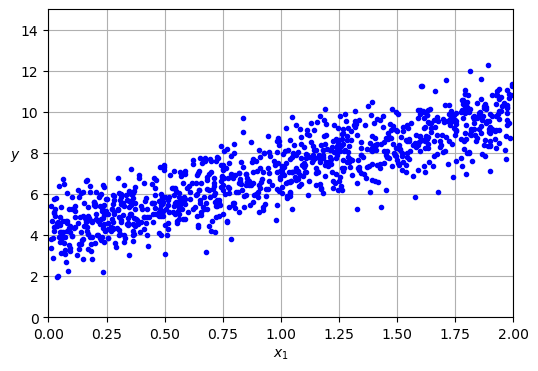

In [174]:
#plot dataset

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [197]:
def learning_schedule(t,t0=5,t1=50):
    return t0/(t+t1)


def sgd_regressor(X, y, learning_rate=0.2, n_epochs=50):
    
    m = len(X)
    
    theta = np.random.randn(2,1)
    theta_path_sgd = [] 
    loss_path_sgd = []

    X_b = add_dummy_feature(X)  # add b to each instance

    for epoch in range(n_epochs):
        
        for i in range(m):
            
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2*xi.T.dot(xi.dot(theta)-yi)
            lr = learning_schedule(epoch*m + i)
            theta = theta - lr * gradients 
            theta_path_sgd.append(theta)
    
    return theta, theta_path_sgd

In [198]:
sgd_theta, theta_path_sgd = sgd_regressor(X,y)
print(sgd_theta)

[[4.01787638]
 [2.96101623]]


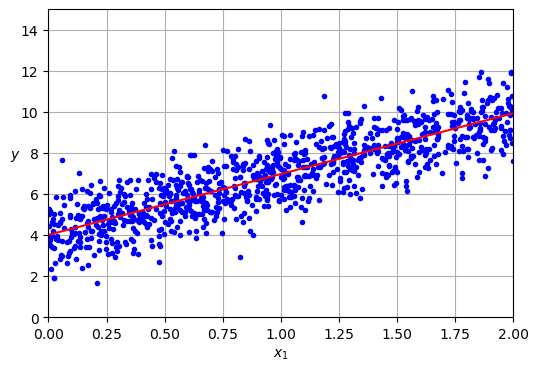

In [199]:
#plot prediction

#SGD
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

y_predict = X_new_b @ sgd_theta

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="SGD_Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

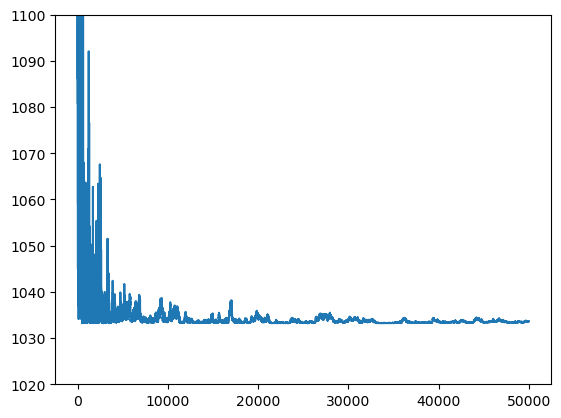

In [203]:
#Error path
X_b = add_dummy_feature(X)
loss_path_sgd = []
for theta in theta_path_sgd:
    loss = np.sum(np.square(X_b.dot(theta)-y))
    loss_path_sgd.append(loss)

plt.plot(loss_path_sgd)
plt.ylim(1020,1100)
plt.show()


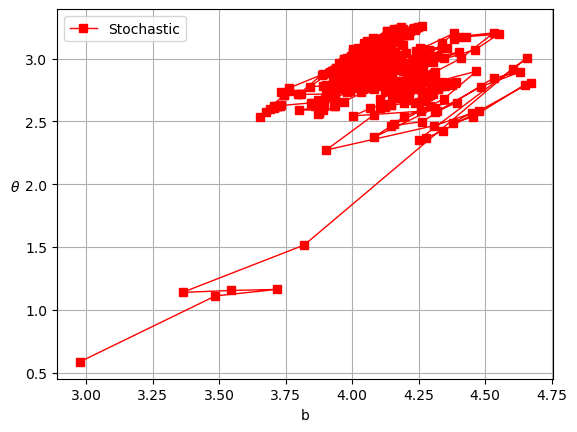

In [204]:
from math import ceil

theta_path_sgd = np.array(theta_path_sgd)


#plt.figure(figsize=(7, 4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")

plt.legend(loc="upper left")
plt.xlabel("b")
plt.ylabel(r"$\theta$   ", rotation=0)
#plt.axis([2.6, 5, 2.3, 4])
plt.grid()

plt.show()